<a href="https://colab.research.google.com/github/marreapato/ML_Project_Taxi_Trip_Duration/blob/main/Projeto_Lucas_Rabelo_AM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/machine-learning

!ls




/content/gdrive/MyDrive/machine-learning
Failing_Equipment_Exercise.xlsx  test.csv  train.csv


# Extração e Leitura dos Dados

In [3]:


# For visualizations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


# Análise Inicial

Alguns arrendodamentos foram feitos na análise, utilizando a regra geral de arredondamento para elhor interpretabilidade dos resultados.

No conjunto de treinamento há uma média de aproximadente 2 passageiros por viagem, sendo que até 50% das viagens contém apenas um passageiro, além disso a duração média das viagens é de 959 segundos (ou de aproximadamente 16 minutos)

In [5]:
train['trip_duration'].mean()/60

15.991537882672764

In [6]:
train.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


No  conjunto de testes a média de passageiros por viagens também foi de aproximadamente 2 passageiros e até 50% das viagens continham apenas um passageiro

In [7]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


Além disso nem no conjunto de teste, nem no conjunto de treinamento há a presença de valores faltantes (missing data)

In [8]:
train.isnull().values.any()

False

In [9]:
test.isnull().values.any()

False

<ipython-input-10-d1b9e1d33f42>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = train.groupby('store_and_fwd_flag').mean()


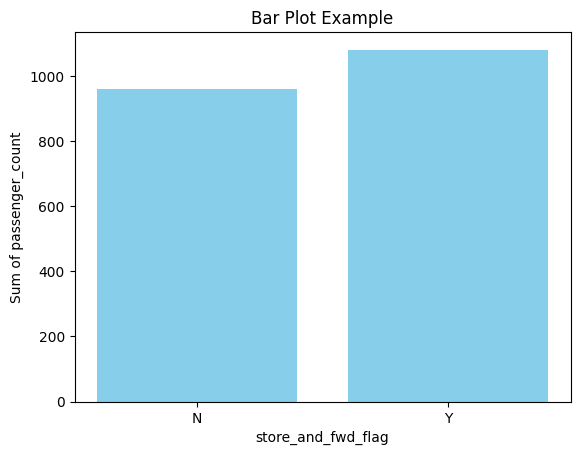

In [10]:
# Group by 'Category' and sum the values
grouped_df = train.groupby('store_and_fwd_flag').mean()
grouped_df
# Resetting the index to make 'store_and_fwd_flag' a regular column
grouped_df = grouped_df.reset_index()

# Creating a bar plot
plt.bar(grouped_df['store_and_fwd_flag'],grouped_df['trip_duration'], color='skyblue')


# Adding labels and title
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Sum of passenger_count')
plt.title('Bar Plot Example')

# Display the plot
plt.show()

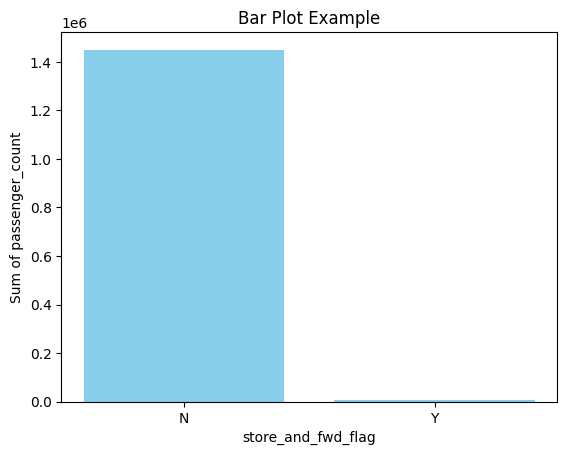

In [11]:
# Group by 'Category' and sum the values
grouped_df = train.groupby('store_and_fwd_flag').size().reset_index(name='counts')
grouped_df

# Resetting the index to make 'store_and_fwd_flag' a regular column
grouped_df = grouped_df.reset_index()

grouped_df

# Creating a bar plot
plt.bar(grouped_df['store_and_fwd_flag'],grouped_df['counts'], color='skyblue')


# Adding labels and title
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Sum of passenger_count')
plt.title('Bar Plot Example')

# Display the plot
plt.show()




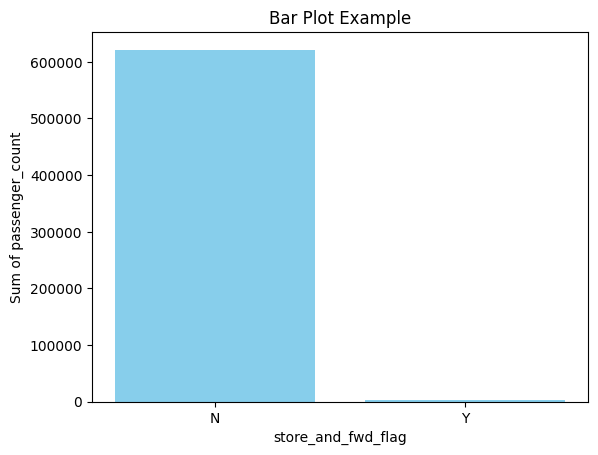

In [12]:
# Group by 'Category' and sum the values
grouped_df = test.groupby('store_and_fwd_flag').size().reset_index(name='counts')
grouped_df

# Resetting the index to make 'store_and_fwd_flag' a regular column
grouped_df = grouped_df.reset_index()

grouped_df

# Creating a bar plot
plt.bar(grouped_df['store_and_fwd_flag'],grouped_df['counts'], color='skyblue')


# Adding labels and title
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Sum of passenger_count')
plt.title('Bar Plot Example')

# Display the plot
plt.show()




# Pré-Processamento

A formula de Haversine (https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-a-sphere-the-haversine-formula/ba-p/902128), foi utilizada para capturar a distancia em kilomentros entre a latitude e longitude de origem e a de destino:

In [13]:
!pip install haversine

In [14]:
import haversine as hs #https://stackoverflow.com/questions/38623122/finding-the-distance-between-several-points-lat-long

train['start_coord'] = list(zip(train.pickup_latitude, train.pickup_longitude))
train['end_coord'] = list(zip(train.dropoff_latitude, train.dropoff_longitude))

train["Haversine_dist"] = train.apply(lambda x: hs.haversine(x["start_coord"], x["end_coord"]), axis=1)

test['start_coord'] = list(zip(test.pickup_latitude, test.pickup_longitude))
test['end_coord'] = list(zip(test.dropoff_latitude, test.dropoff_longitude))

test["Haversine_dist"] = test.apply(lambda x: hs.haversine(x["start_coord"], x["end_coord"]), axis=1)


train["Haversine_dist"]

0          1.498523
1          1.805510
2          6.385107
3          1.485500
4          1.188590
             ...   
1458639    1.225082
1458640    6.049844
1458641    7.824617
1458642    1.092565
1458643    1.134044
Name: Haversine_dist, Length: 1458644, dtype: float64

Dias da semana, hora do dia, mês

<ipython-input-15-bbe0ca215620>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_weekday = train.groupby('weekday').mean().reset_index()
<ipython-input-15-bbe0ca215620>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_hour = train.groupby('hour_of_day').mean().reset_index()


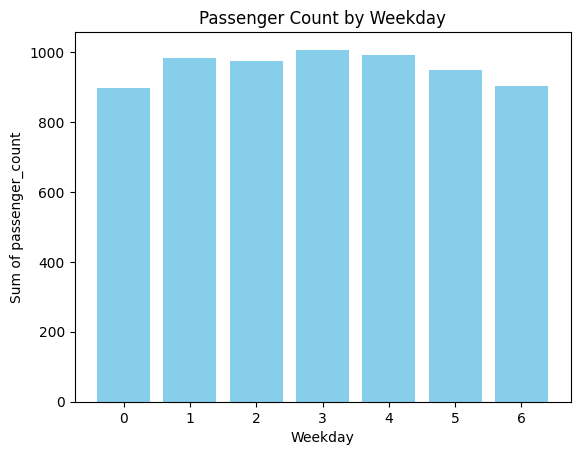

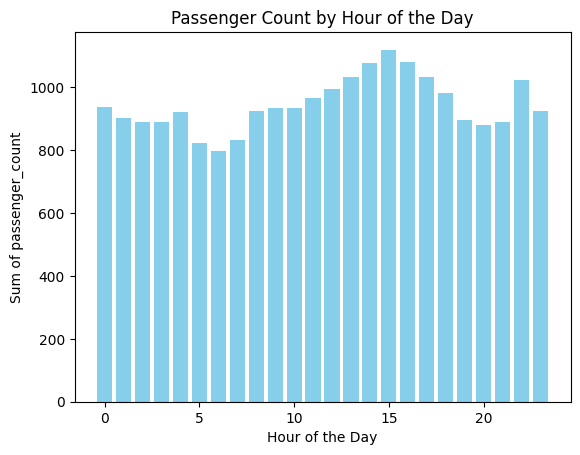

In [15]:
# Convert 'pickup_datetime' to datetime type
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

# Extract weekday and hour of the day
train['weekday'] = train['pickup_datetime'].dt.weekday
train['hour_of_day'] = train['pickup_datetime'].dt.hour

# Group by 'weekday' and sum the values
grouped_weekday = train.groupby('weekday').mean().reset_index()

# Group by 'hour_of_day' and sum the values
grouped_hour = train.groupby('hour_of_day').mean().reset_index()

# Creating a bar plot for weekday
plt.bar(grouped_weekday['weekday'], grouped_weekday['trip_duration'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Sum of passenger_count')
plt.title('Passenger Count by Weekday')
plt.show()

# Creating a bar plot for hour of the day
plt.bar(grouped_hour['hour_of_day'], grouped_hour['trip_duration'], color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Sum of passenger_count')
plt.title('Passenger Count by Hour of the Day')
plt.show()

In [16]:
!pip install holidays

In [33]:
min(train['pickup_datetime'].dt.year)-max(train['pickup_datetime'].dt.year)

0

            pickup_datetime  is_holiday
0       2016-03-14 17:24:55       False
1       2016-06-12 00:43:35       False
2       2016-01-19 11:35:24       False
3       2016-04-06 19:32:31       False
4       2016-03-26 13:30:55       False
...                     ...         ...
1458639 2016-04-08 13:31:04       False
1458640 2016-01-10 07:35:15       False
1458641 2016-04-22 06:57:41       False
1458642 2016-01-05 15:56:26       False
1458643 2016-04-05 14:44:25       False

[1458644 rows x 2 columns]


<ipython-input-34-47e1e185275d>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_hour = train.groupby('is_holiday').mean().reset_index()


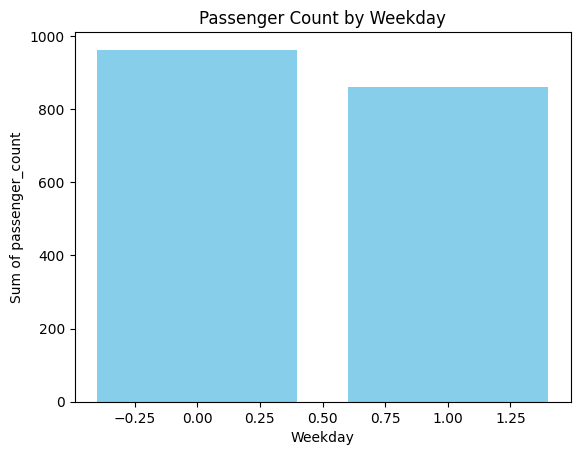

In [34]:
import holidays

# Assuming 'train' is your DataFrame

# Convert 'pickup_datetime' to datetime type
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

# Create a column to indicate if the date is a holiday
us_holidays = holidays.UnitedStates(years=2016,prov='NY')  # You can choose the country accordingly
train['is_holiday'] = train['pickup_datetime'].dt.date.apply(lambda x: x in us_holidays)

# Display the DataFrame with the new 'is_holiday' column
print(train[['pickup_datetime', 'is_holiday']])

# Group by 'hour_of_day' and sum the values
grouped_hour = train.groupby('is_holiday').mean().reset_index()

# Creating a bar plot for weekday
plt.bar(grouped_hour['is_holiday'], grouped_hour['trip_duration'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Sum of passenger_count')
plt.title('Passenger Count by Weekday')
plt.show()


<ipython-input-35-1b376110c3e5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_weekday = train.groupby('pickup_month').mean().reset_index()


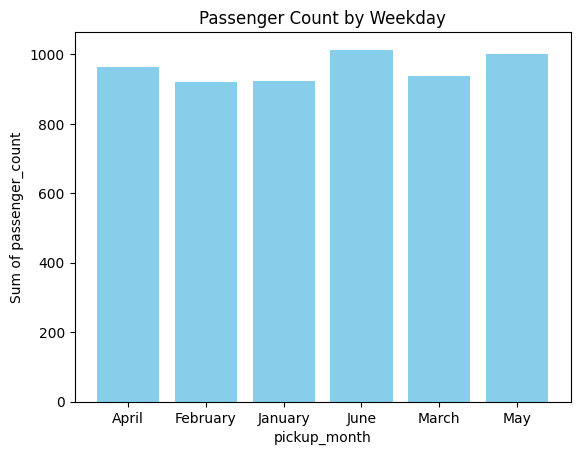

In [35]:
train['pickup_month']=train['pickup_datetime'].dt.month_name()
# Group by 'weekday' and sum the values
grouped_weekday = train.groupby('pickup_month').mean().reset_index()

# Creating a bar plot for weekday
plt.bar(grouped_weekday['pickup_month'], grouped_weekday['trip_duration'], color='skyblue')
plt.xlabel('pickup_month')
plt.ylabel('Sum of passenger_count')
plt.title('Passenger Count by Weekday')
plt.show()